# Forest Cover Classification Portfolio Project

In this project, you will use deep learning to predict forest cover type (the most
common kind of tree cover) based only on cartographic variables. The actual forest
cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS)
Region 2 Resource Information System data. The covertypes are the following:

   - Spruce/Fir
   - Lodgepole Pine
   - Ponderosa Pine
   - Cottonwood/Willow
   - Aspen
   - Douglas-fir
   - Krummholz

Independent variables were then derived from data obtained from the US Geological Survey
and USFS. The data is raw and has not been scaled or preprocessed. It contains
binary columns of data for qualitative independent variables such as wilderness areas
and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest
of northern Colorado. These areas represent forests with minimal human-caused disturbances,
so existing forest cover types are mainly a result of ecological processes rather
than forest management practices.

Project Objectives:
   - Develop one or more classifiers for this multi-class classification problem.
   - Use TensorFlow with Keras to build your classifier(s).
   - Use your knowledge of hyperparameter tuning to improve the performance of your model(s).
   - Test and analyze performance.
   - Create clean and modular code.
    
This is the first attempt using a K-Nearest Neighbors classifier.

To see how well the model predicts after it's trained, we'll then plot accuracy and loss and also check the precision, recall and f1 score. We'll also plot a confusion matrix.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('cover_data.csv')
print(dataset.info())
print()
print(dataset.head())
print()
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [12]:
labels = dataset.iloc[:,-1]
#print(labels.head())
features = dataset.iloc[:,0:10]
#print(features.head())
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(features_train, labels_train)

KNeighborsClassifier()

In [14]:
predictions = knn_clf.predict(features_test)

In [15]:
print(predictions)

[2 2 1 ... 2 2 7]


In [19]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

acc_score = knn_clf.score(features_test, labels_test)
precision = precision_score(labels_test, predictions, average='micro', zero_division=1)
recall = recall_score(labels_test, predictions, average='micro', zero_division=1)
print("Accuracy : ", round(acc_score,3), "  Precision: ", precision, "  Recall: ", recall)
print(confusion_matrix(labels_test, predictions))

    
    

Accuracy :  0.966   Precision:  0.9656118046631174   Recall:  0.9656118046631174
[[61375  2000     1     0    29     1   146]
 [ 1910 82690   112     0   173    86    20]
 [    3   153 10349    37    18   166     0]
 [    0     1   114   642     0    67     0]
 [   38   281    22     0  2502     5     0]
 [    5   144   217    20     6  4818     0]
 [  181    36     0     0     2     0  5934]]


In [21]:
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, predictions, target_names=class_names))

                   precision    recall  f1-score   support

       Spruce/Fir       0.97      0.97      0.97     63552
   Lodgepole Pine       0.97      0.97      0.97     84991
   Ponderosa Pine       0.96      0.96      0.96     10726
Cottonwood/Willow       0.92      0.78      0.84       824
            Aspen       0.92      0.88      0.90      2848
      Douglas-fir       0.94      0.92      0.93      5210
        Krummholz       0.97      0.96      0.97      6153

         accuracy                           0.97    174304
        macro avg       0.95      0.92      0.93    174304
     weighted avg       0.97      0.97      0.97    174304



In [23]:
cm = confusion_matrix(labels_test, predictions)

[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

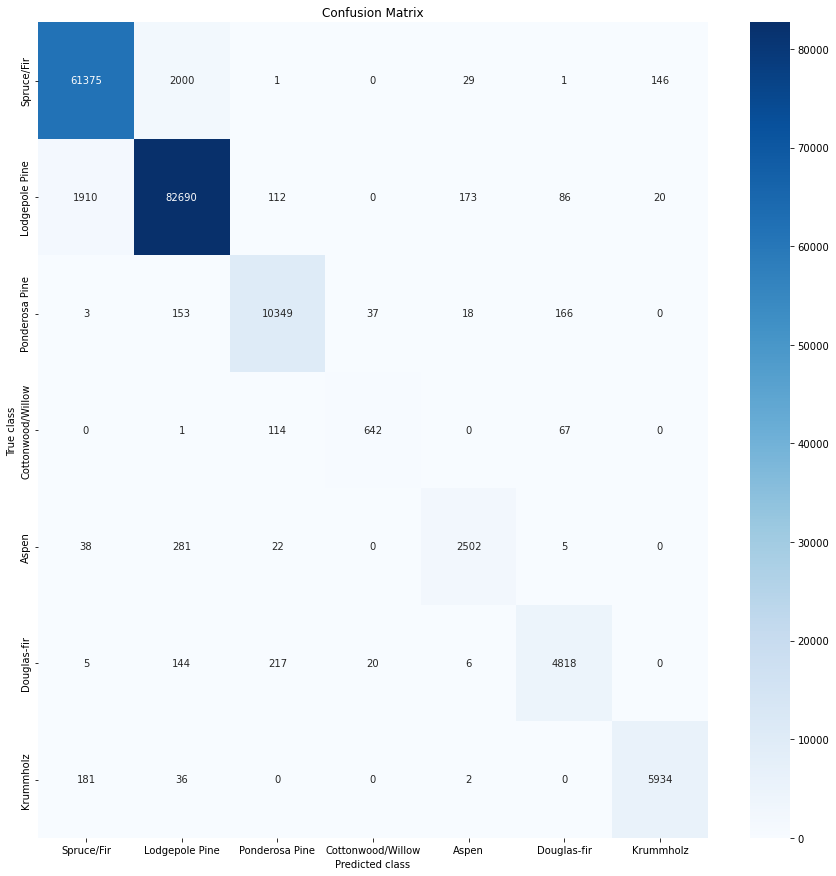

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

Now trying with scaled and normalized data

In [25]:
from sklearn.preprocessing import StandardScaler

stan_scaler = StandardScaler()

features_train_normalized = stan_scaler.fit_transform(features_train)
features_test_normalized = stan_scaler.transform(features_test)

# features_train_scale = ct.fit_transform(features_train)
# features_test_scale = ct.transform(features_test)

In [26]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(features_train_normalized, labels_train)

KNeighborsClassifier()

In [27]:
predictions = knn_clf.predict(features_test_normalized)

In [28]:
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, predictions, target_names=class_names))

                   precision    recall  f1-score   support

       Spruce/Fir       0.90      0.90      0.90     63552
   Lodgepole Pine       0.91      0.92      0.92     84991
   Ponderosa Pine       0.85      0.87      0.86     10726
Cottonwood/Willow       0.79      0.67      0.72       824
            Aspen       0.82      0.68      0.74      2848
      Douglas-fir       0.78      0.71      0.75      5210
        Krummholz       0.92      0.89      0.91      6153

         accuracy                           0.90    174304
        macro avg       0.85      0.81      0.83    174304
     weighted avg       0.90      0.90      0.90    174304



[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

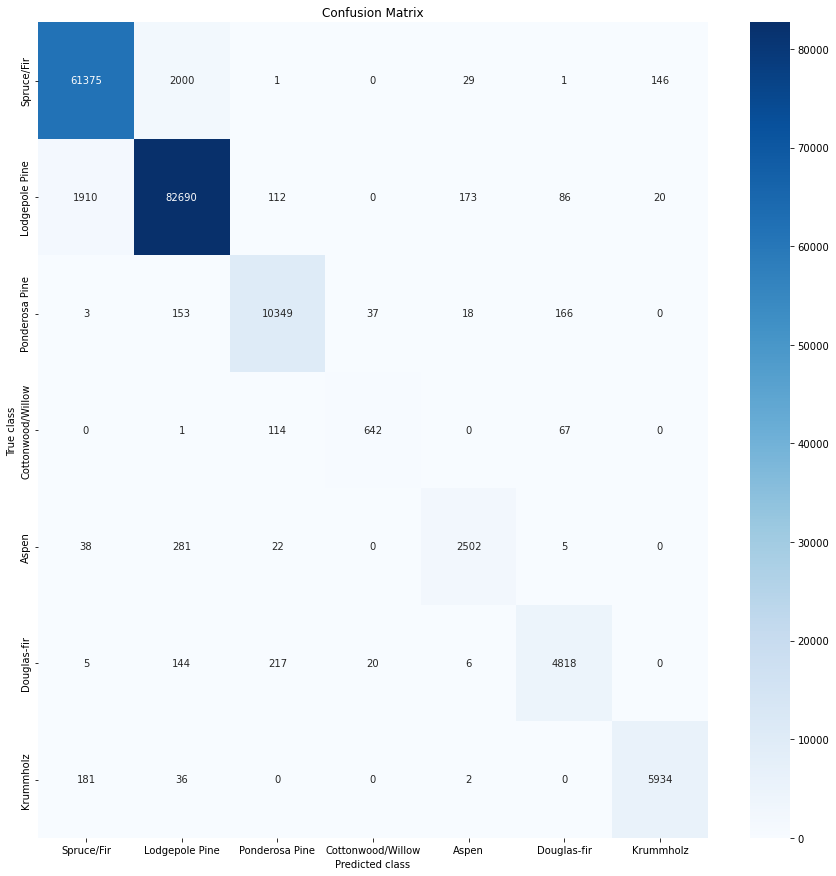

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)